A battery’s state of charge at time step $k$ is given by $q(k)$, with $q(k)=1$ corresponding to fully charged and $q(k)=0$ depleted. In each time step (e.g. each hour) $k$, the battery powers a process which consumes energy $j(k)={j_0}+v(k)$, where $j_0$ is the average amount of energy consumed, and $v(k)$ is a random deviation, so that
$$q(k) = q(k−1) − j(k−1)$$

We have perfect knowledge of the battery’s initial charge, $q(0)=1$, and we know that $v(k)$ is white and normally distributed as $\mathcal{N}(0,{\sigma}_v^2)$.  

With parameters $j_0=0.1$ and $\sigma_v=0.05$, we will do simulations of $10^6$ different evolutions, compute their mean & standard deviation across $k\in\{0,1,...,20\}$. Three plots will be made against time: the mean $E[q(k)]$, the standard deviation $\sqrt{Var[q(k)]}$, and the fraction of sample paths where the charge $q(k)$ at time $k$ is less than or equal to zero. In other words, we will simulate $10^6$ batteries (each with its own samples for $v$), and from our simulations approximate $Prob(q(k)<0)$ as a function of $k$. 

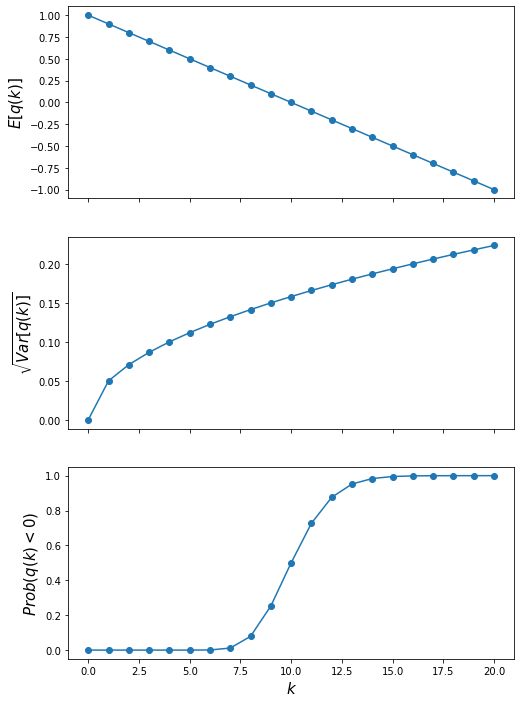

In [20]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt


j_0 = 0.1
sigma_v = 0.05
k = 20
n = 1000000
q0 = 1

v = np.random.normal(loc = 0, scale = sigma_v, size = (n, k))

q = np.empty((n, k+1))
q[:, 0] = q0

E_q = np.empty(k+1)
E_q[0] = q0
sigma_q = np.empty(k+1)
sigma_q[0] = 0
frac = np.empty(k+1)
frac[0] = 0

for i in range(k):
    q[:, i+1] = q[:, i] - (j_0 + v[:, i])
    E_q[i+1] = np.mean(q[:, i+1])
    sigma_q[i+1] = np.std(q[:, i+1])
    frac[i+1] = (np.count_nonzero(q[:, i+1] <= 0)) / n

K = np.arange(k + 1)

fig, axs = plt.subplots(3, 1, figsize = (8, 12))
axs[0].plot(K, E_q, marker = 'o')
axs[0].set_ylabel(r'$E[q(k)]$', fontsize = '15')
axs[0].tick_params('x', labelbottom=False)

axs[1].plot(K, sigma_q, marker = 'o')
axs[1].set_ylabel(r'$\sqrt{Var[q(k)]}$', fontsize = '15')
axs[1].tick_params('x', labelbottom=False)

axs[2].plot(K, frac, marker = 'o')
axs[2].set_xlabel(r'$k$', fontsize = '15')
axs[2].set_ylabel(r'$Prob(q(k)<0)$', fontsize = '15')

plt.show()